In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###  Load the Dataset

In [2]:
df = pd.read_csv('Boston.csv')
# df = pd.read_csv('Dataset/Boston.csv')
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.tail()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,506,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


### Step 2 : Sanity check of dataset

In [4]:
df.shape

(506, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [6]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Step 3 : EDA - Exploratory Data Analysis

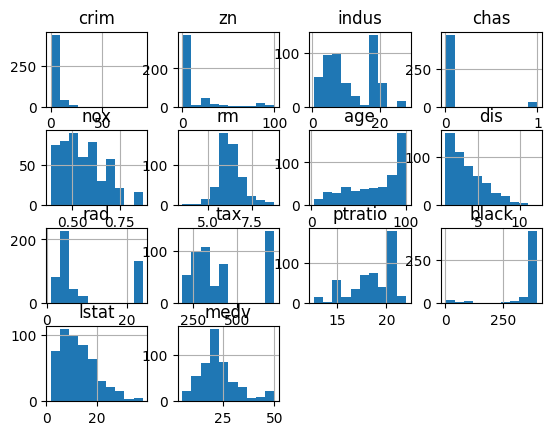

In [7]:
df.hist()
plt.show()

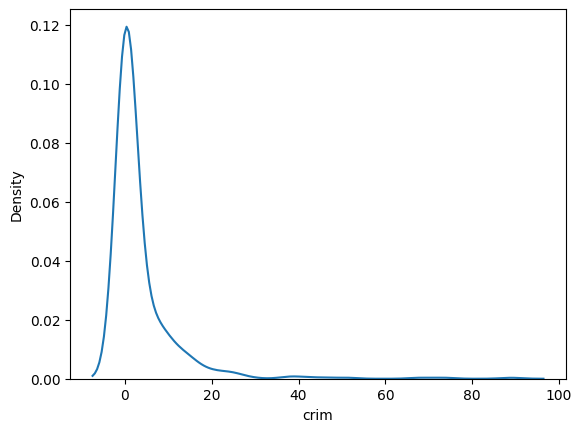

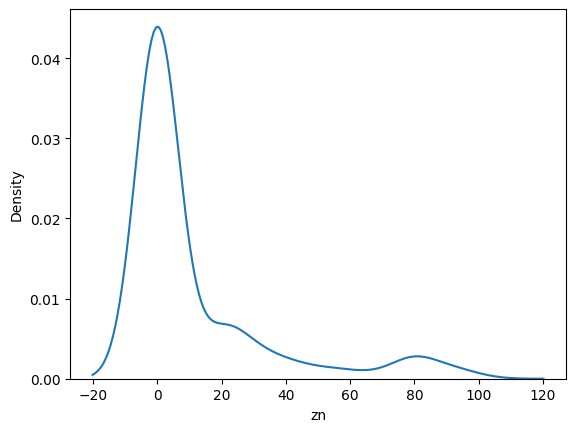

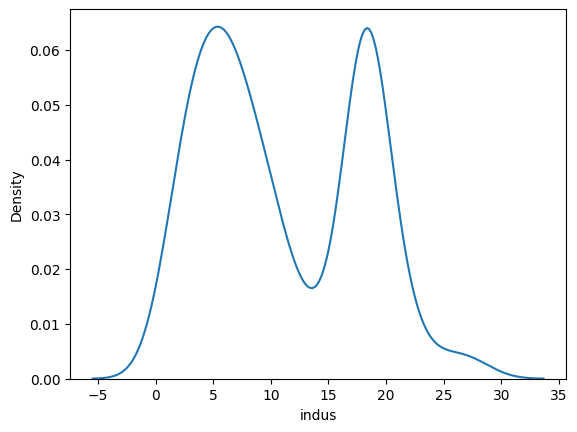

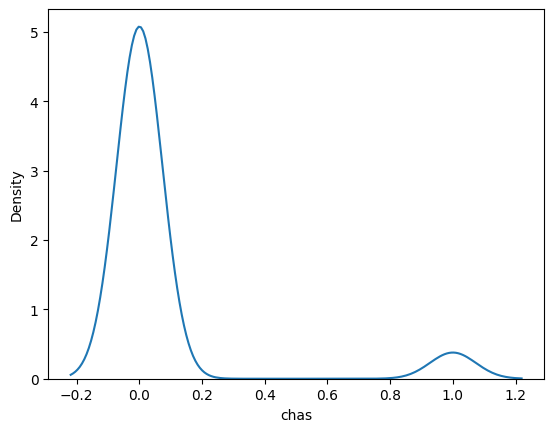

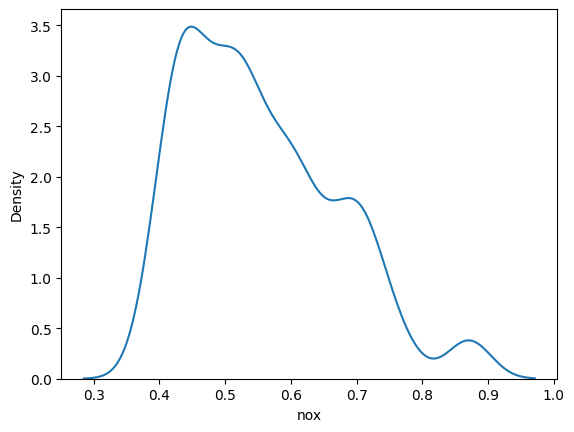

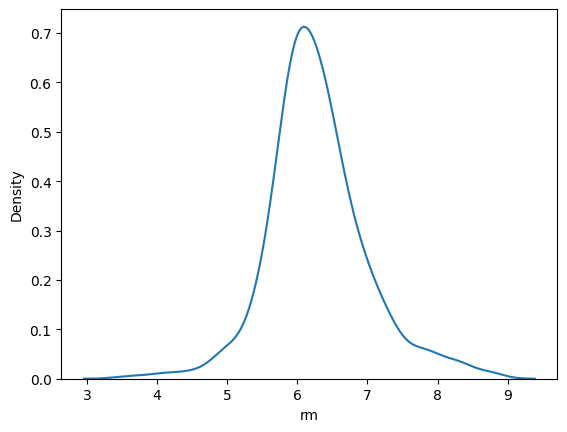

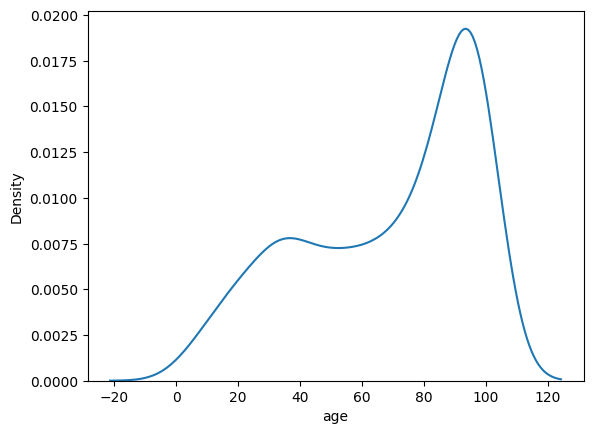

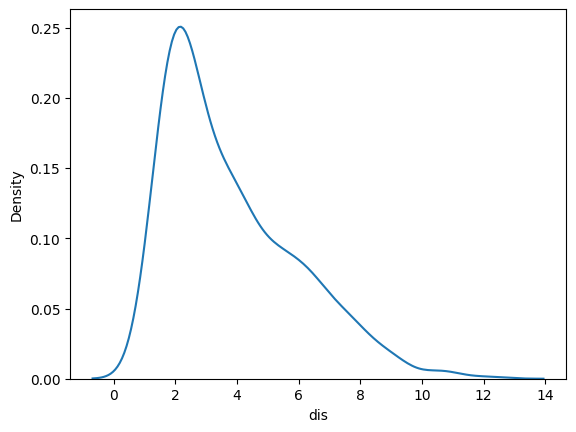

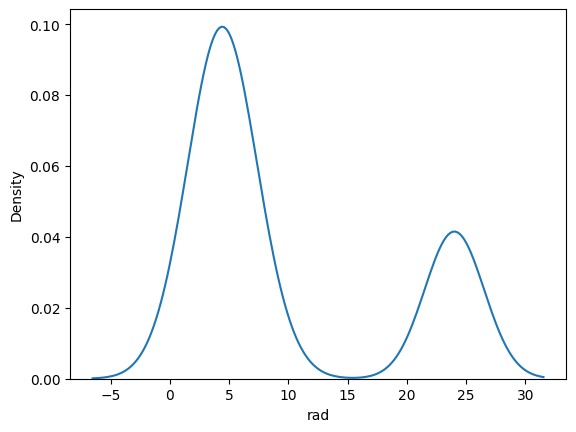

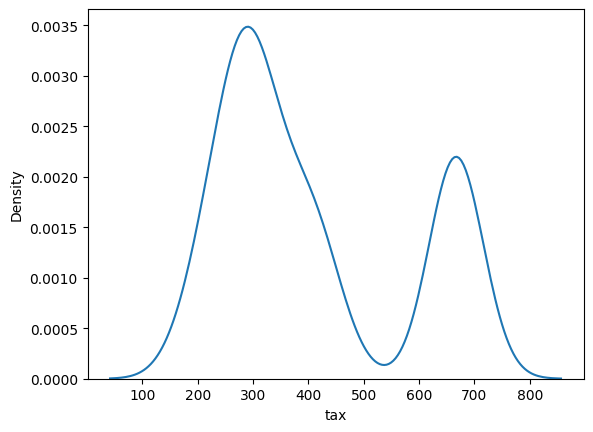

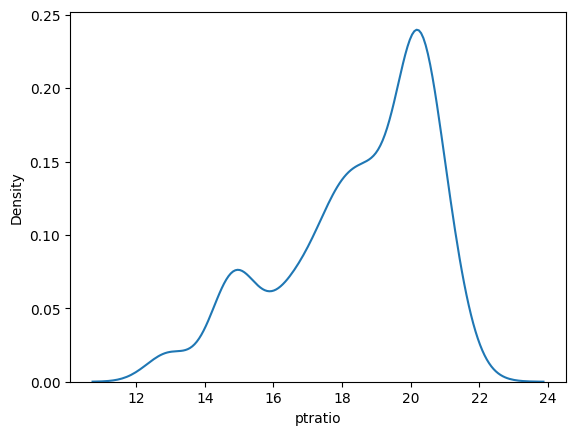

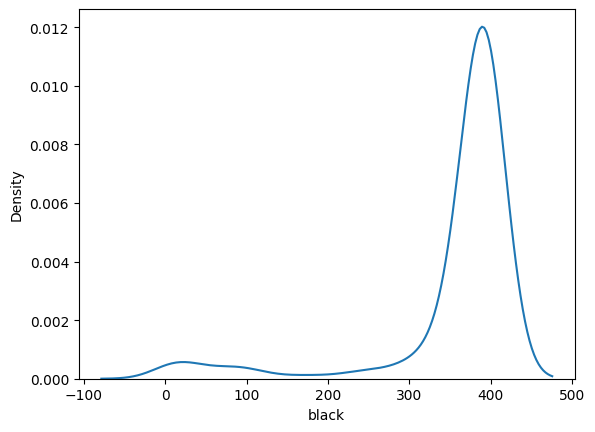

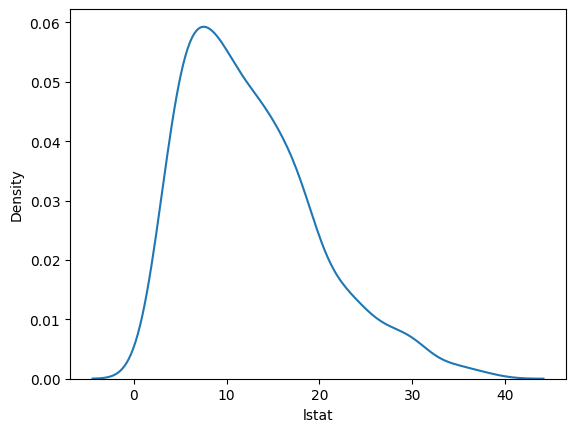

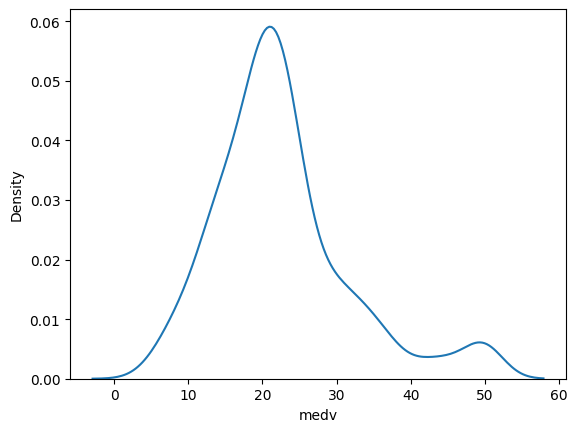

In [8]:
import warnings

warnings.filterwarnings('ignore')

for i in df.columns:
    sns.kdeplot(data=df,x=i)
    plt.show()

### Step 4 : Missing Value

In [9]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

### Step 5 : Find Outlier

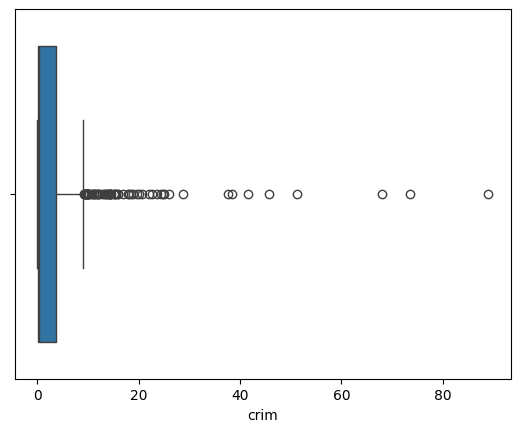

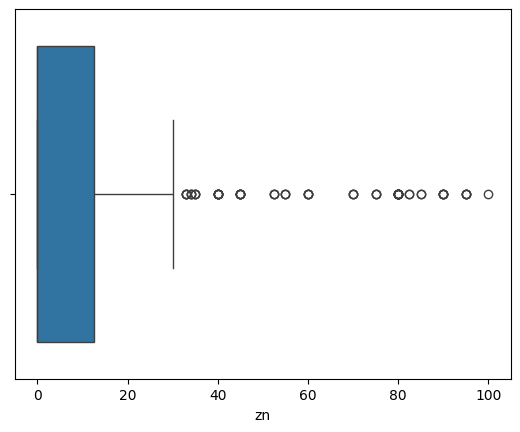

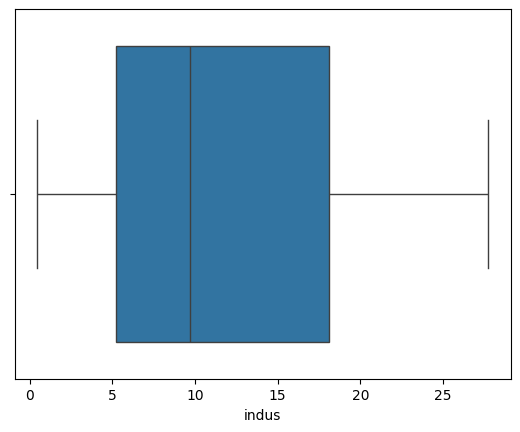

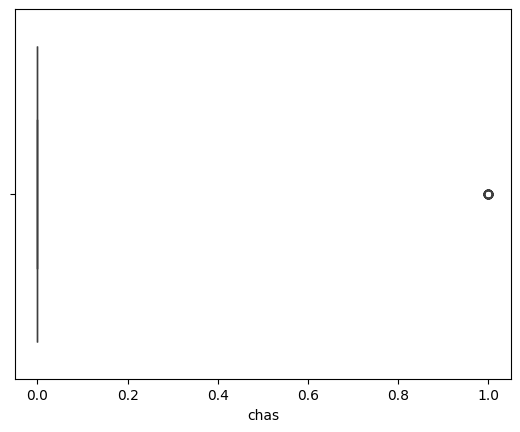

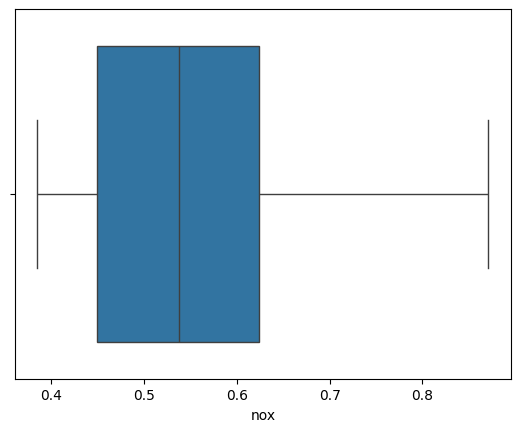

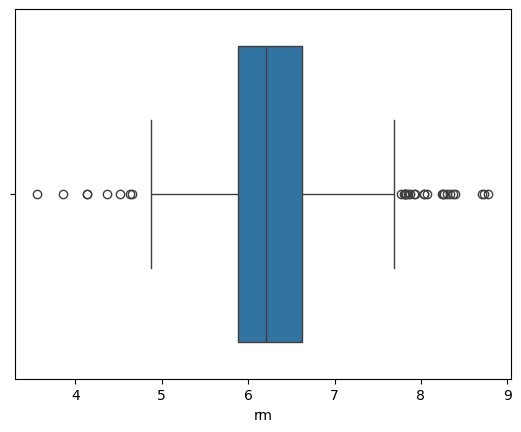

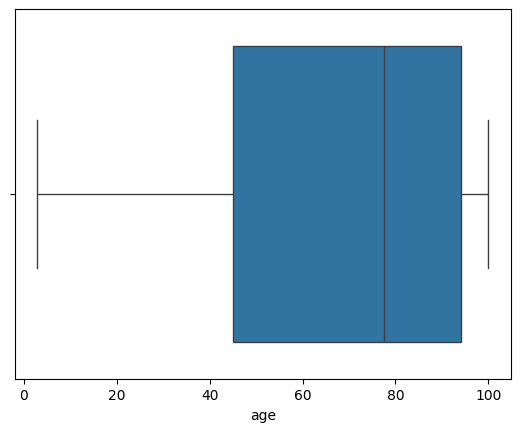

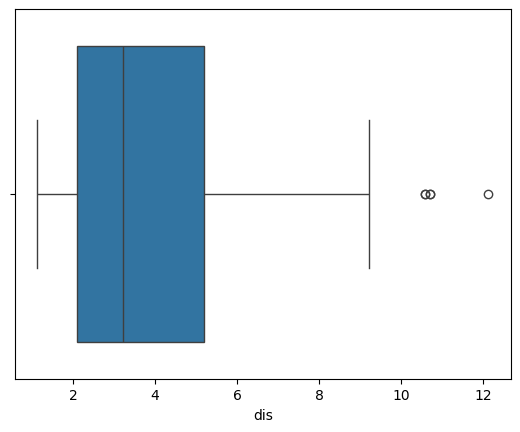

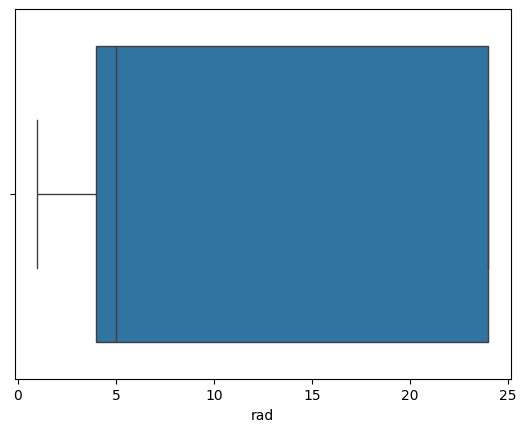

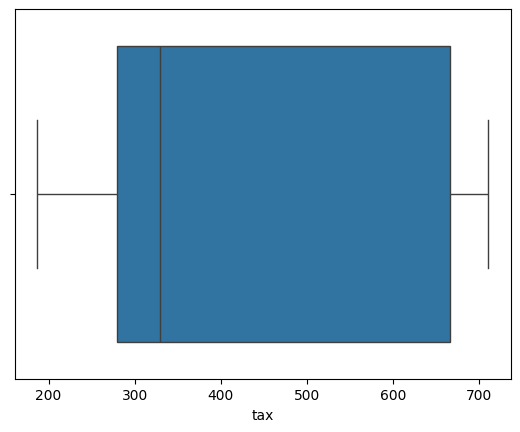

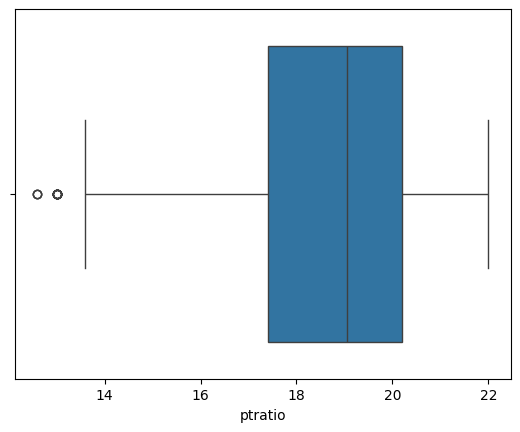

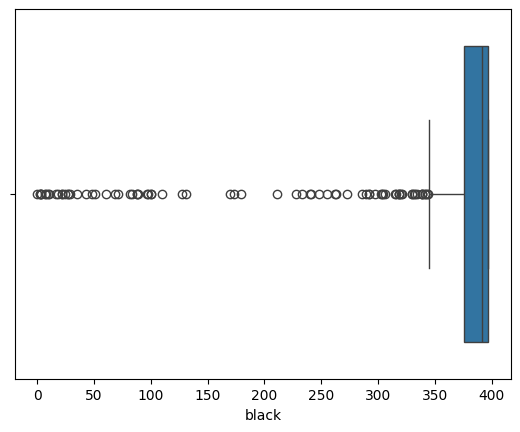

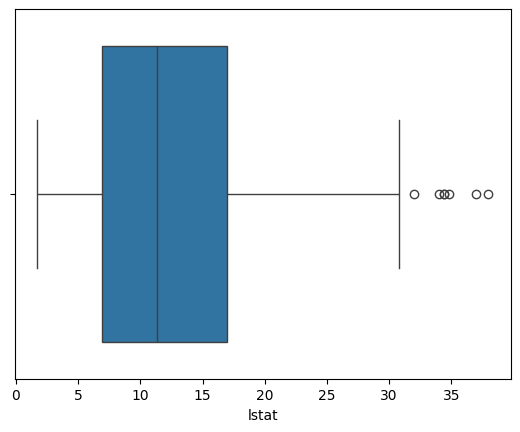

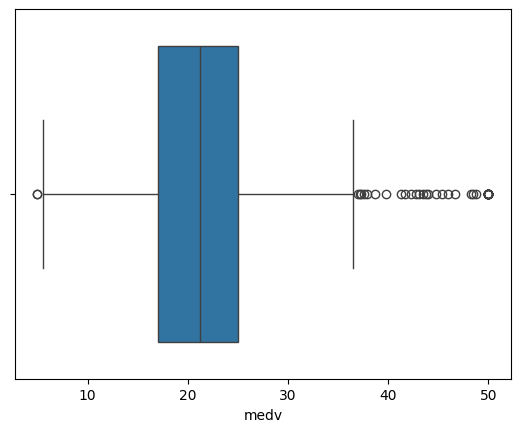

In [10]:

for i in df.columns:
    sns.boxplot(data=df,x=i)
    plt.show()

### Step 6: Find Correlation

In [11]:
target = 'medv'
f_list = list(df.columns)
f_list.remove(target)

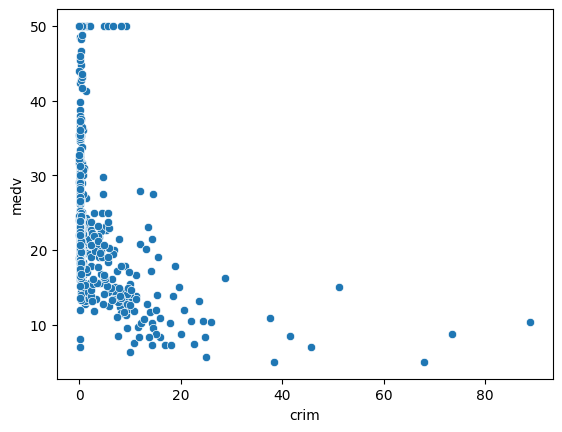

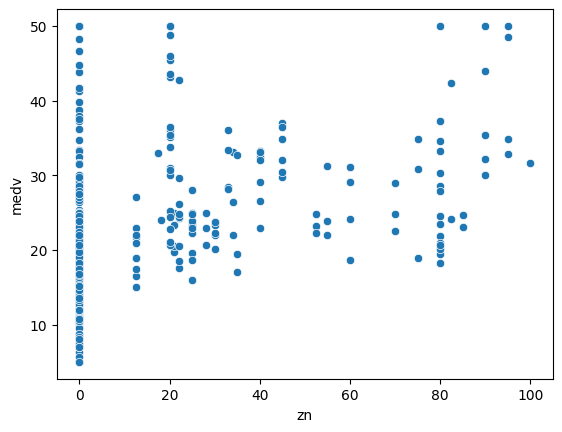

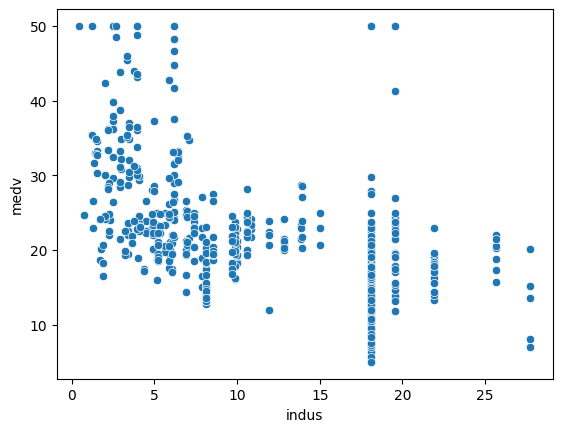

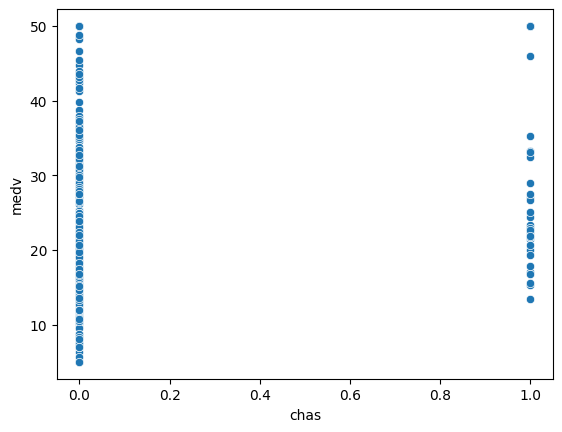

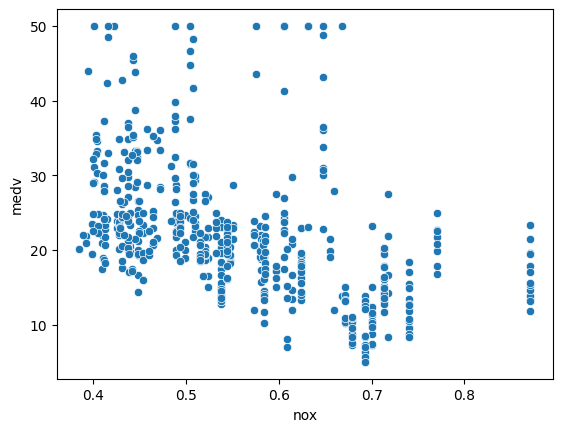

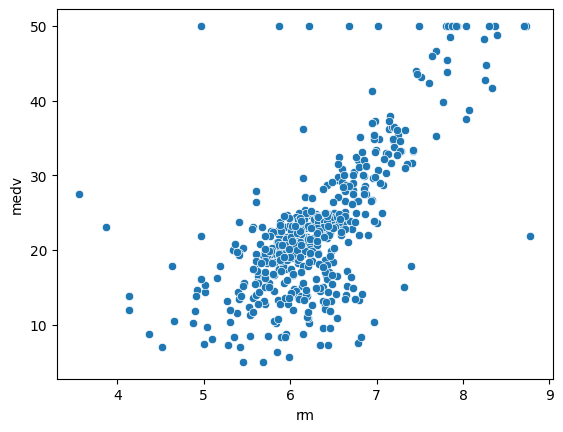

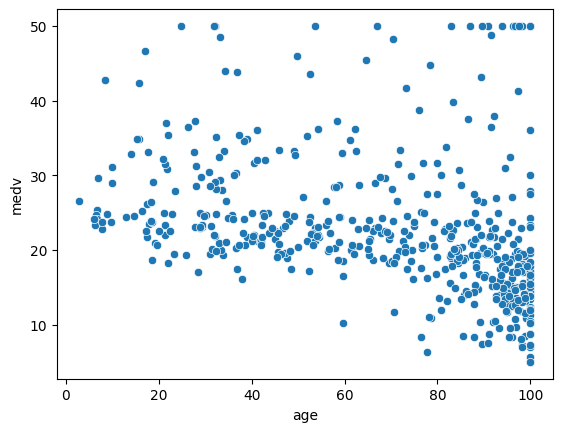

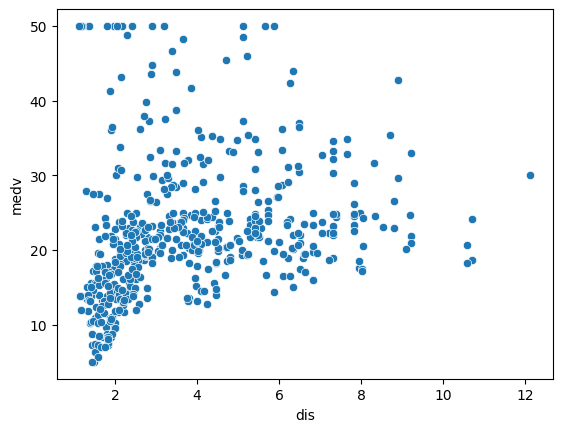

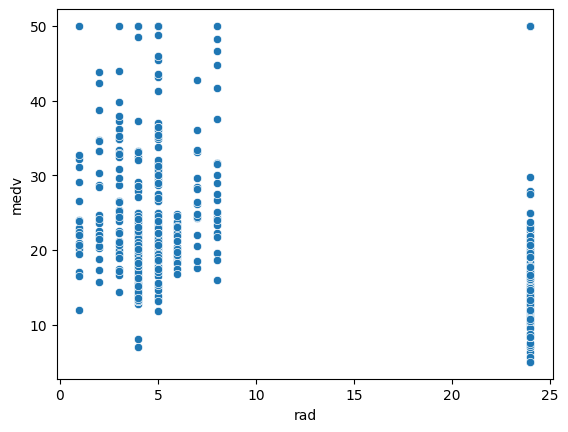

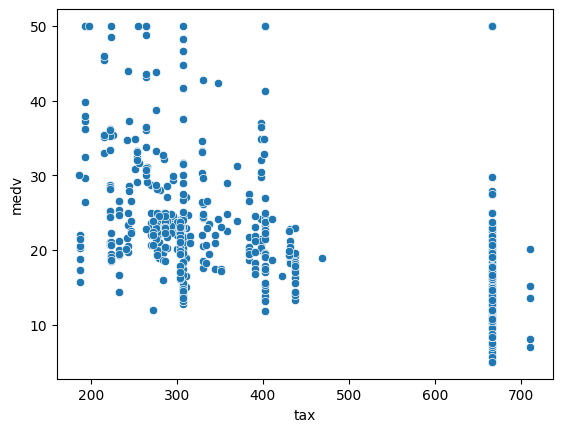

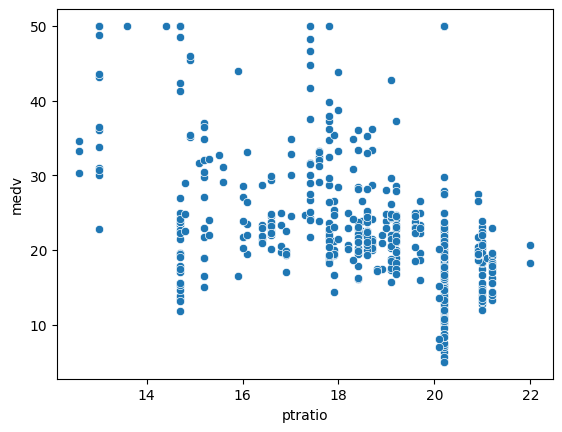

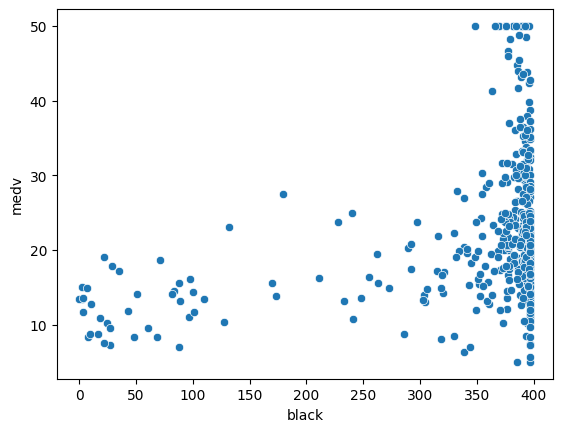

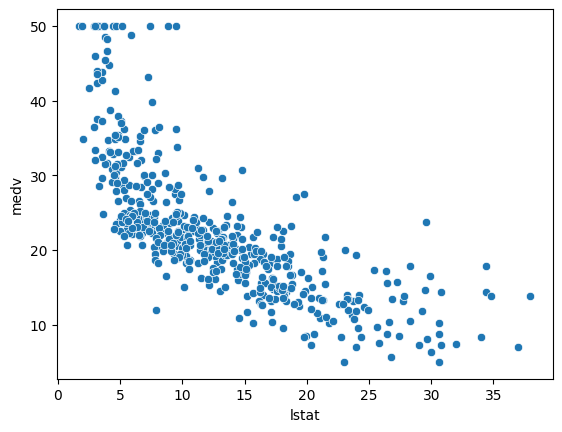

In [12]:

for i in f_list:
    sns.scatterplot(data=df,x=i,y=target)
    plt.show()

### Remove outlier

In [13]:
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [14]:
for i in f_list:
    lw, uw =wisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i])


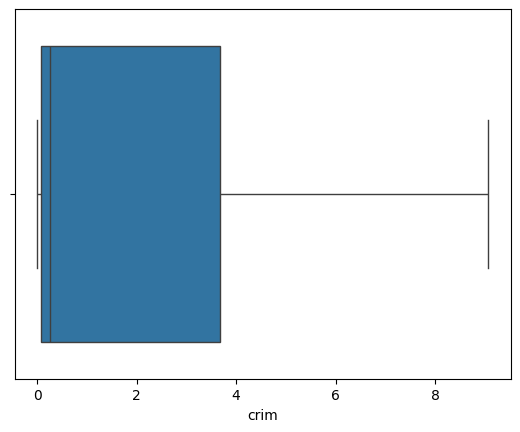

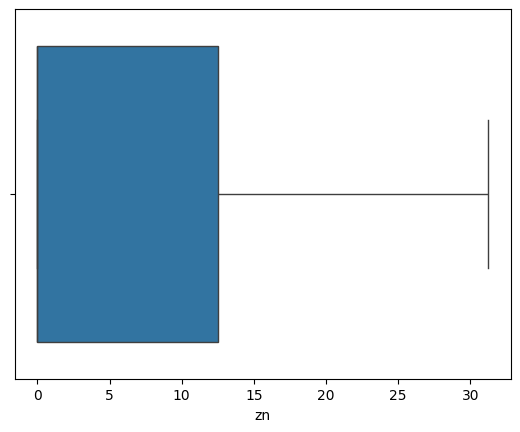

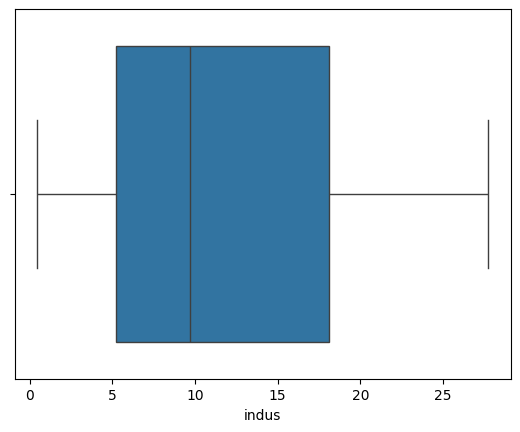

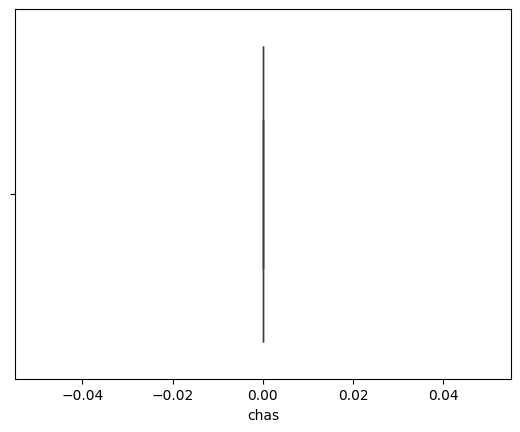

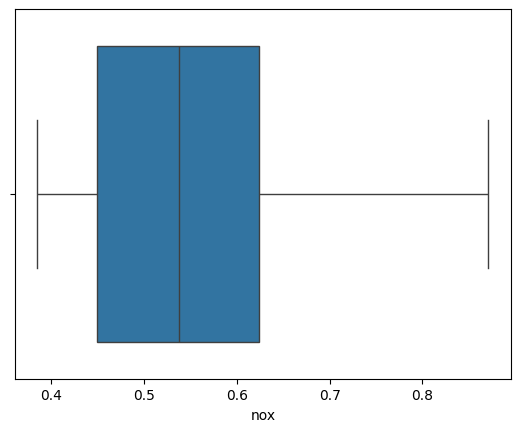

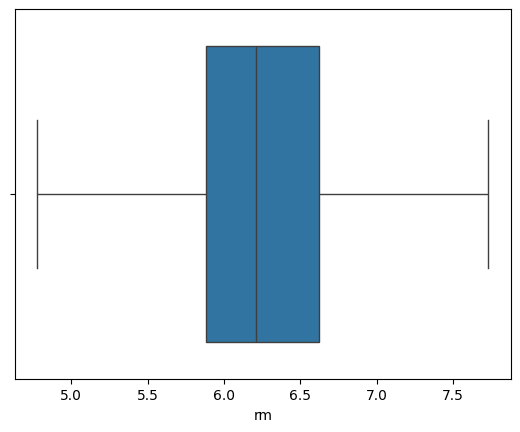

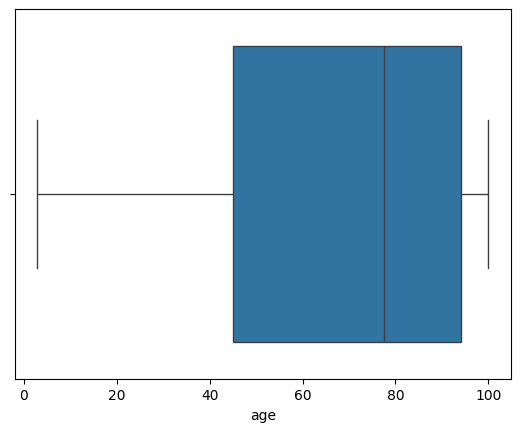

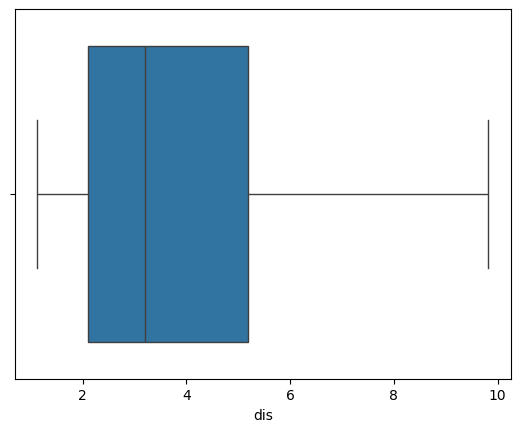

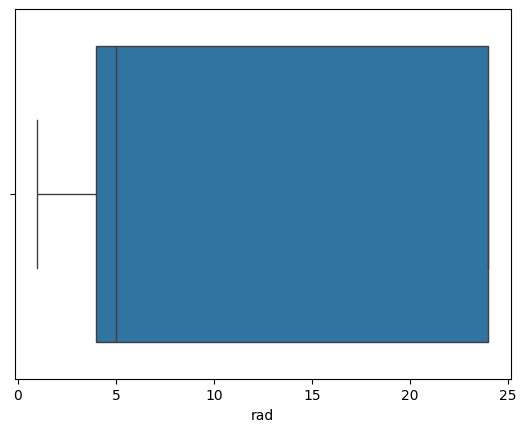

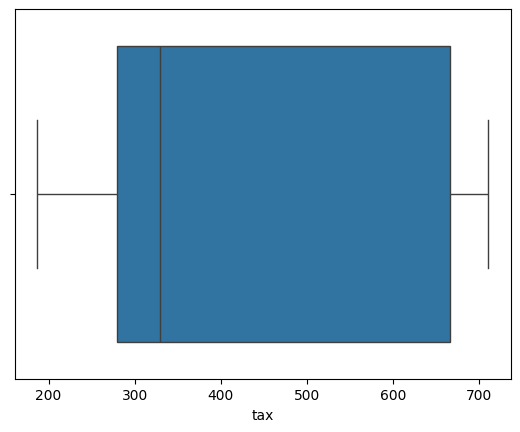

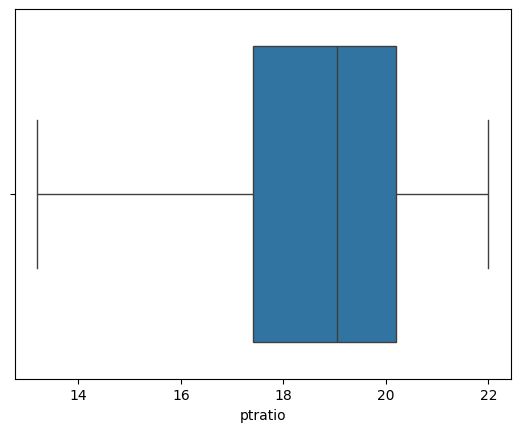

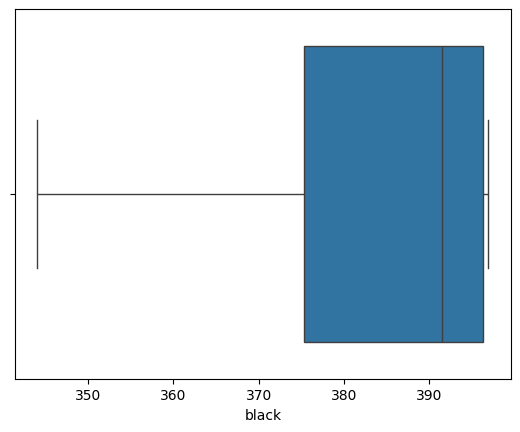

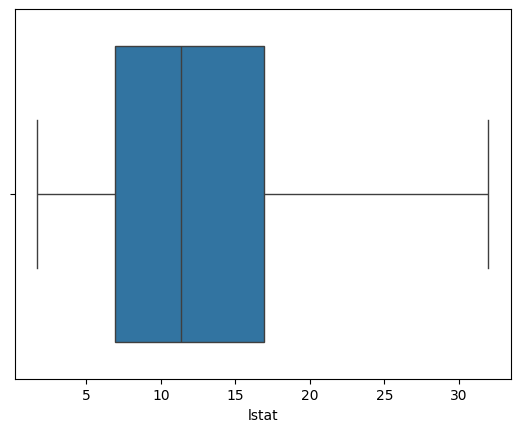

In [15]:
for i in f_list:
    sns.boxplot(data=df,x=i)
    plt.show()

### Step 8 : convert to normal distribution

<Axes: xlabel='medv', ylabel='Density'>

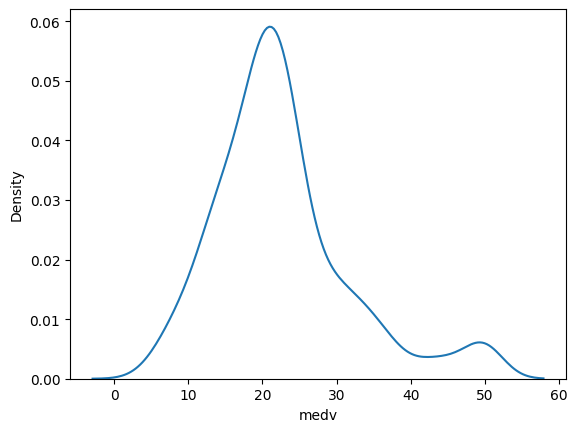

In [16]:
sns.kdeplot(df[target])

<Axes: xlabel='medv', ylabel='Density'>

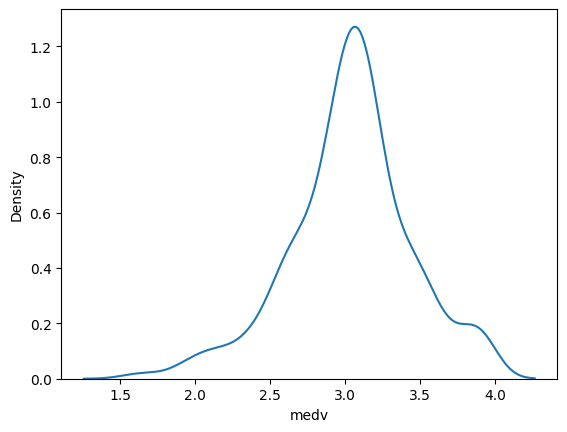

In [17]:
# log transformation
sns.kdeplot(np.log(df[target]))

<Axes: ylabel='Density'>

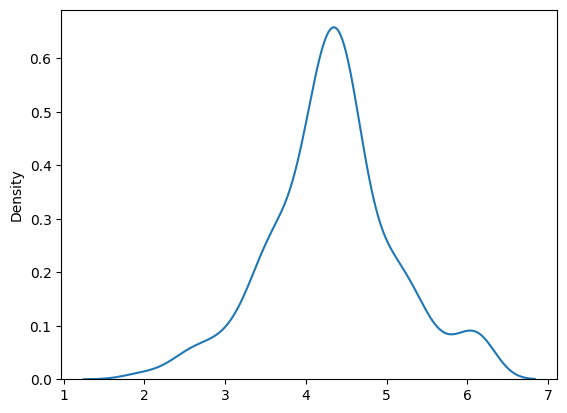

In [18]:
# boxcox transformation
from scipy.stats import boxcox

sns.kdeplot(boxcox(df[target])[0])

### Step 9 : Building model

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [20]:
x = df.drop(target, axis=1)
y = df[target]

In [21]:
x.shape, y.shape

((506, 13), (506,))

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=23, test_size=0.3)

### Scale the feature

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_train.columns)

In [24]:
model.fit(x_train, y_train)

LinearRegression()

In [25]:
y_pre = model.predict(x_test)
y_pre[:5]

array([26.31309436, 27.12307794, 26.62902794, 16.82453152, 38.24895744])

In [26]:
model.score(x_test, y_test)

0.6960710111643706

### eveluating model

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
mse = mean_squared_error(y_test, y_pre)
mse

np.float64(25.25290178638566)

In [29]:
# RMSE
np.sqrt(mse)

np.float64(5.02522654080248)

In [30]:
r2_score(y_test,y_pre)

0.6960710111643706

In [31]:
print(f"intercept = {model.intercept_}")
cof = model.coef_
for i,j in zip(x_train.columns,cof):
    print(f"{i} = {j}")

intercept = 22.563559322033903
crim = -2.258326038231702
zn = 0.28476290464830467
indus = -0.029328644887897548
chas = -5.342948306008566e-16
nox = -1.450767658088688
rm = 2.934522132968504
age = 0.13190664151550063
dis = -2.491725693735464
rad = 3.0210446420002537
tax = -1.1116112857203722
ptratio = -2.18455349341943
black = 0.3986556067696555
lstat = -3.9777523438387132


### Step 10 : Apply other models

In [32]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

In [33]:
p_x_train = poly.fit_transform(x_train)
p_x_test = poly.transform(x_test)

In [34]:
# now apply linear regression on this updated fetured with degree 3
model.fit(p_x_train, y_train)

LinearRegression()

In [35]:
model.score(p_x_train,y_train)

0.8483094830174915

In [36]:
model.score(p_x_test,y_test)

0.7424682921474397

### Ridge and Lasso Regression

In [37]:
from sklearn.linear_model import Ridge, Lasso

In [41]:
ridge = Ridge(alpha=1.1)

In [43]:
ridge.fit(p_x_train,y_train)
ridge.score(p_x_test,y_test)

0.8266888643264483